<a href="https://colab.research.google.com/github/JakubDemeszko/ML_Course/blob/main/ML/sci_kit08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 # Klasyfikacja wieloklasowa -> Support Vector Machine do Klasyfikacji obrazow
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import plotly.figure_factory as ff

 from sklearn import datasets
 from sklearn.metrics import classification_report
 from sklearn.metrics import confusion_matrix
 sns.set()

In [6]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
images = digits.images
labels = digits.target

In [9]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

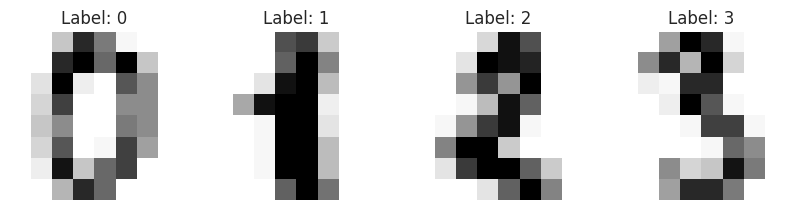

In [10]:
plt.figure(figsize=(10,10))
for index, (image,label) in enumerate(list(zip(images,labels))[:4]):
  plt.subplot(2,4,index+1)
  plt.axis('off')
  plt.imshow(image,cmap='Greys')
  plt.title('Label: {}'.format(index,label))

In [13]:
# Przygotowanie danych do modelu,
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images,labels)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train[0]

array([ 0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  1., 15.,  5.,
       16.,  3.,  0.,  0.,  0., 13.,  4.,  0., 15.,  5.,  0.,  0.,  0.,
       15., 11., 14., 16.,  2.,  0.,  0.,  8., 16., 16., 13.,  5.,  0.,
        0.,  0.,  3., 15., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
       10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.])

In [14]:
# Trenowanie modelu
from sklearn.svm import SVC
classifier = SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [15]:
# Predykcja
y_pred = classifier.predict(X_test)
y_pred

array([4, 9, 8, 4, 1, 2, 4, 6, 3, 8, 4, 1, 9, 4, 0, 6, 9, 8, 5, 3, 3, 4,
       9, 1, 8, 2, 8, 4, 9, 8, 2, 1, 9, 3, 7, 8, 4, 1, 2, 5, 5, 1, 1, 9,
       4, 7, 1, 8, 5, 6, 6, 3, 3, 6, 1, 5, 2, 1, 7, 5, 1, 7, 0, 2, 7, 4,
       0, 7, 9, 3, 4, 9, 1, 0, 6, 3, 5, 4, 4, 0, 7, 7, 4, 0, 4, 5, 6, 3,
       5, 0, 1, 9, 9, 4, 6, 5, 3, 2, 3, 8, 1, 7, 3, 4, 3, 8, 7, 7, 8, 1,
       3, 9, 1, 7, 7, 6, 8, 2, 7, 3, 0, 9, 0, 5, 6, 5, 9, 7, 2, 1, 5, 6,
       0, 4, 4, 0, 2, 8, 3, 5, 2, 6, 1, 1, 7, 8, 7, 7, 1, 8, 0, 4, 4, 9,
       1, 5, 5, 1, 9, 2, 8, 1, 3, 6, 8, 6, 8, 5, 6, 4, 6, 5, 1, 5, 7, 5,
       7, 6, 0, 6, 7, 9, 8, 7, 2, 1, 6, 3, 7, 1, 5, 8, 6, 8, 7, 7, 4, 2,
       8, 6, 9, 9, 8, 1, 6, 5, 2, 8, 6, 8, 6, 8, 8, 6, 0, 4, 2, 7, 4, 3,
       4, 2, 0, 1, 4, 3, 3, 4, 3, 3, 2, 8, 3, 8, 5, 8, 8, 4, 4, 7, 6, 6,
       3, 5, 9, 9, 9, 8, 2, 0, 7, 2, 0, 1, 9, 4, 3, 6, 1, 8, 0, 8, 8, 7,
       0, 6, 8, 2, 3, 3, 1, 1, 0, 3, 3, 4, 1, 9, 8, 2, 0, 2, 9, 1, 3, 5,
       1, 5, 1, 6, 3, 1, 8, 7, 8, 1, 7, 6, 1, 9, 4,

In [16]:
# Ocena modelu
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      1.00      0.99        52
           2       1.00      1.00      1.00        35
           3       0.98      1.00      0.99        47
           4       1.00      1.00      1.00        50
           5       0.98      1.00      0.99        42
           6       1.00      0.98      0.99        46
           7       0.98      1.00      0.99        46
           8       0.98      0.98      0.98        51
           9       1.00      0.93      0.96        42

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [17]:
# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 39]])

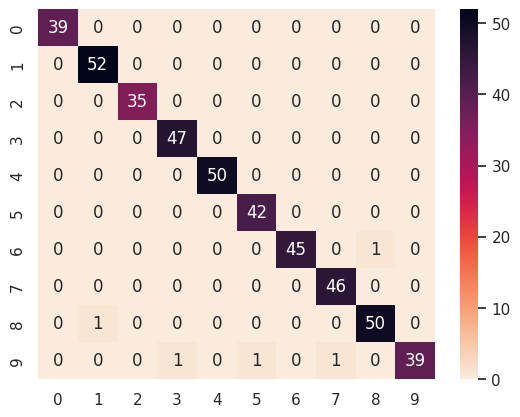

In [18]:
#Tworzenie heatmap - przykladowo mielismy liczbe 8 i przewidzielismy liczbe 1
_ = sns.heatmap(cm, annot = True, cmap=sns.cm.rocket_r)

In [20]:
# Wyswietlenie miejsc, gdzie predykcja byla bledna, wycigamy indexy, gdzie byl blad
results = pd.DataFrame(data = {'y_pred': y_pred, 'y_test': y_test})
errors = results[results['y_pred'] != results['y_test']]
error_idxs = list(errors.index)
error_idxs

[333, 386, 395, 425, 447]